#Importação de bibliotecas

In [ ]:
# Installation
!pip install pycaret
!pip install flaml[automl] matplotlib openml

In [62]:
import shutil
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif, f_regression
from flaml import AutoML
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
from sklearn.linear_model import LogisticRegression


#**Coleta e pré-processamento de dados:**

In [2]:
# Carrega dados de arquivos .npy usando NumPy e, em seguida, cria DataFrames do pandas com esses dados.
shutil.unpack_archive('/content/drive/MyDrive/Dados_Ava.zip', 'content/data')

with open('/content/data/Dados_Avaliação_P1_2024_1/Classes.npy', 'rb') as f:
  dc = np.load(f, allow_pickle=True)
  dt_class = pd.DataFrame(dc)
  dt_class.replace('Classe A', 0,inplace=True)
  dt_class.replace('Classe B', 1,inplace=True)
  dt_class.replace('Classe C', 2,inplace=True)
  dt_class.replace('Classe D', 3,inplace=True)
  dt_class.replace('Classe E', 4,inplace=True)



with open('/content/data/Dados_Avaliação_P1_2024_1/Dados_1.npy', 'rb') as f:
  data = np.load(f, allow_pickle=True)
  df_1 = pd.DataFrame(data)
  df_1.drop(df_1.columns[[200]], axis=1, inplace=True)
  df_1['Classes'] = dt_class






with open('/content/data/Dados_Avaliação_P1_2024_1/Dados_2.npy', 'rb') as f:
  data = np.load(f, allow_pickle=True)
  df_2 = pd.DataFrame(data)
  df_2.drop(df_2.columns[[200]], axis=1, inplace=True)
  df_2['Classes'] = dt_class




with open('/content/data/Dados_Avaliação_P1_2024_1/Dados_3.npy', 'rb') as f:
  data = np.load(f, allow_pickle=True)
  df_3 = pd.DataFrame(data)
  df_3.drop(df_3.columns[[200]], axis=1, inplace=True)
  df_3['Classes'] = dt_class



with open('/content/data/Dados_Avaliação_P1_2024_1/Dados_4.npy', 'rb') as f:
  data = np.load(f, allow_pickle=True)
  df_4 = pd.DataFrame(data)
  df_4['Classes'] = dt_class





with open('/content/data/Dados_Avaliação_P1_2024_1/Dados_5.npy', 'rb') as f:
  data = np.load(f, allow_pickle=True)
  df_5 = pd.DataFrame(data)
  # my_imputer = SimpleImputer(missing_values=np.nan, strategy = 'median')
  # df_5_new = pd.DataFrame(my_imputer.fit_transform(df_5))
  imputer = KNNImputer(n_neighbors=2, weights="uniform")
  df_5_new = pd.DataFrame(imputer.fit_transform(df_5))
  df_5['Classes'] = dt_class










#**Análise exploratória de dados:**

In [ ]:
df_1.describe()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.007289,0.007187,0.007660,0.008018,0.008396,0.007812,0.006954,0.006113,0.006830,0.007849,...,0.007123,0.007967,0.007985,0.007306,0.006202,0.006234,0.006831,0.008016,0.008111,0.008129
std,0.085314,0.085315,0.085607,0.085666,0.087407,0.086596,0.088514,0.085360,0.085222,0.085682,...,0.085383,0.085730,0.085442,0.085686,0.085595,0.085583,0.085959,0.086225,0.085671,0.085294
min,-0.378568,-0.348952,-0.379936,-0.378360,-0.342088,-0.389444,-0.359782,-0.322280,-0.355839,-0.361581,...,-0.350720,-0.369974,-0.349106,-0.390344,-0.441082,-0.392542,-0.357499,-0.329713,-0.423119,-0.366331
25%,-0.049378,-0.049555,-0.048688,-0.048348,-0.048804,-0.048556,-0.050016,-0.050902,-0.050010,-0.049618,...,-0.050189,-0.049309,-0.048573,-0.050141,-0.050337,-0.050310,-0.050297,-0.049501,-0.048265,-0.048473
50%,0.006772,0.006710,0.007225,0.007587,0.007790,0.006814,0.006334,0.005773,0.006749,0.006956,...,0.006364,0.007202,0.007414,0.006995,0.006042,0.005788,0.006468,0.007840,0.007567,0.007256
75%,0.063485,0.063567,0.064876,0.064693,0.065283,0.064269,0.063285,0.062706,0.063293,0.064836,...,0.063698,0.064828,0.064830,0.064497,0.062584,0.062591,0.063859,0.065483,0.065059,0.064815
max,0.394856,1.000000,0.387984,0.422204,4.000000,3.000000,5.000000,0.397177,0.401343,0.399806,...,0.356731,0.397707,0.394810,0.363095,0.428676,0.399029,0.431874,0.380536,0.381942,0.376908


In [ ]:
df_2.describe()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.007429,0.006079,0.005777,0.007024,0.008554,0.009425,0.009220,0.008332,0.006749,0.006704,...,0.006223,0.006356,0.007168,0.008157,0.008812,0.008491,0.007969,0.008447,0.009178,0.008692
std,0.184788,0.185121,0.186277,0.185731,0.185365,0.185401,0.186190,0.185756,0.184938,0.185616,...,0.184704,0.187311,0.185800,0.184736,0.184234,0.185569,0.186525,0.185257,0.185349,0.185220
min,-0.836852,-0.947977,-0.856497,-0.888746,-0.779579,-0.927522,-0.933543,-1.064409,-0.929456,-1.083725,...,-0.845241,-1.088036,-0.999823,-0.952023,-0.911602,-0.951774,-1.018087,-0.945962,-0.898243,-1.046209
25%,-0.110485,-0.112307,-0.113542,-0.112181,-0.109650,-0.108472,-0.108518,-0.110262,-0.111410,-0.111972,...,-0.112041,-0.112065,-0.111663,-0.109152,-0.109094,-0.109947,-0.111019,-0.110517,-0.109923,-0.110106
50%,0.005182,0.004965,0.004159,0.004933,0.006880,0.007418,0.007177,0.005608,0.004456,0.004945,...,0.004110,0.005218,0.005784,0.006824,0.006427,0.006214,0.005596,0.006539,0.007161,0.006571
75%,0.125006,0.122995,0.124695,0.125979,0.126523,0.126995,0.127567,0.127063,0.123418,0.125614,...,0.123691,0.124237,0.125720,0.125185,0.126710,0.126240,0.125401,0.124942,0.126383,0.125162
max,0.844976,1.009312,1.073818,0.945777,0.969276,0.947359,0.897111,0.842592,0.903180,0.913761,...,0.915367,5.000000,0.954319,0.976894,0.934610,0.896822,3.000000,0.926960,0.936625,0.909563


In [ ]:
df_3.describe()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.007364,0.007188,0.010472,0.010468,0.009880,0.009110,0.008085,0.008564,0.010404,0.011548,...,0.009642,0.010350,0.011186,0.009841,0.010015,0.009473,0.010317,0.010272,0.009147,0.007458
std,0.234831,0.233902,0.235635,0.237471,0.236489,0.235360,0.235589,0.235230,0.235945,0.235738,...,0.236122,0.234277,0.234980,0.234763,0.234777,0.236648,0.236568,0.234857,0.234904,0.237189
min,-1.160500,-1.287250,-1.409297,-1.120401,-1.234061,-1.117860,-1.202907,-1.293320,-1.145073,-1.319262,...,-1.188803,-1.102983,-1.149958,-1.189867,-1.166174,-1.433024,-1.345256,-1.198916,-1.245255,-1.328928
25%,-0.143990,-0.140879,-0.139374,-0.142344,-0.142503,-0.141739,-0.142342,-0.141838,-0.139243,-0.139698,...,-0.141853,-0.141216,-0.139211,-0.141510,-0.141559,-0.143252,-0.141353,-0.141415,-0.143578,-0.144892
50%,0.005297,0.005511,0.007936,0.008992,0.007657,0.007958,0.006923,0.008082,0.008881,0.009606,...,0.008413,0.008546,0.009267,0.006932,0.008220,0.007554,0.008997,0.007954,0.007808,0.006048
75%,0.158464,0.156764,0.161966,0.162136,0.161074,0.160035,0.159292,0.160919,0.161413,0.162284,...,0.164087,0.161175,0.159998,0.160544,0.161297,0.162490,0.161183,0.162540,0.160559,0.158880
max,1.245040,1.223124,1.259574,4.000000,1.223871,1.225897,1.118453,1.236507,1.493580,1.169479,...,1.086742,1.291096,1.268673,1.382873,1.104898,1.129389,1.295929,1.170741,1.233872,1.297114


In [52]:
df_4.describe().T

,count,mean,std,min,25%,50%,75%,max
0,49949.0,50.0,0.000000,50.0,50.0,50.0,50.0,50.0
1,49932.0,50.0,0.000000,50.0,50.0,50.0,50.0,50.0
2,49955.0,50.0,0.000000,50.0,50.0,50.0,50.0,50.0
3,49940.0,50.0,0.000000,50.0,50.0,50.0,50.0,50.0
4,49939.0,50.0,0.000000,50.0,50.0,50.0,50.0,50.0
...,...,...,...,...,...,...,...,...
196,49953.0,50.0,0.000000,50.0,50.0,50.0,50.0,50.0
197,49946.0,50.0,0.000000,50.0,50.0,50.0,50.0,50.0
198,49956.0,50.0,0.000000,50.0,50.0,50.0,50.0,50.0
199,49959.0,50.0,0.000000,50.0,50.0,50.0,50.0,50.0


In [ ]:
df_5.describe()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
count,48760.000000,48793.000000,48811.000000,48769.000000,48738.000000,48776.000000,48822.000000,48777.000000,48799.000000,48759.000000,...,48825.000000,48784.000000,48834.000000,48798.000000,48754.000000,48758.000000,48769.000000,48786.000000,48810.000000,48758.000000
mean,48.171903,48.226336,48.151227,48.175697,48.283013,47.980309,48.293169,48.358992,48.351152,48.358350,...,48.117208,48.530025,48.419275,48.164886,48.150535,48.250841,48.270815,48.290799,48.506421,48.725258
std,33.727605,33.772113,33.718041,33.614475,33.724703,33.685095,33.572119,33.720010,33.642793,33.583507,...,33.656421,33.654042,33.749817,33.624399,33.706828,33.698864,33.500802,33.626036,33.865765,33.858791
min,-19.449902,-19.947559,-19.423360,-19.424884,-19.771548,-19.613178,-19.607800,-19.438007,-19.655337,-19.669452,...,-19.331443,-19.357963,-19.603765,-19.634602,-19.381411,-19.552608,-19.693556,-19.686406,-19.533194,-19.616948
25%,22.309652,22.093855,22.182332,22.395859,22.508544,22.163776,22.621406,22.578589,22.623895,22.460733,...,22.206402,22.646801,22.409823,22.483294,22.271366,22.446330,22.555572,22.417031,22.594902,22.613827
50%,43.690278,44.044920,44.014742,44.220240,43.765324,43.720539,43.952475,43.962784,44.183044,44.121983,...,43.842214,44.180046,44.124261,43.681425,43.823449,43.965947,44.095170,44.125049,44.192684,44.720276
75%,71.905092,72.066100,72.026225,71.939241,71.936590,72.027689,72.030185,72.036972,72.069879,72.076460,...,71.917568,72.531487,72.380098,71.925099,71.800314,72.122544,71.886406,71.983987,72.542965,72.857939
max,139.510530,139.412802,139.741928,139.471412,139.594172,139.150733,139.508418,139.721778,139.495520,139.307064,...,139.674149,139.278859,139.475746,139.528672,139.458214,139.686525,139.056941,139.852067,139.764397,139.998311


<AxesSubplot: >

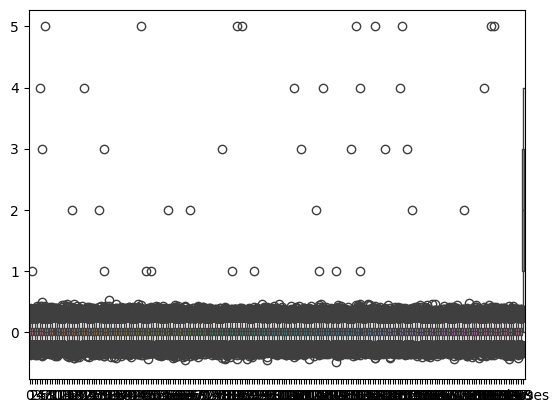

In [5]:
import seaborn as sns

sns.boxplot(df_1.loc[:])

<AxesSubplot: >

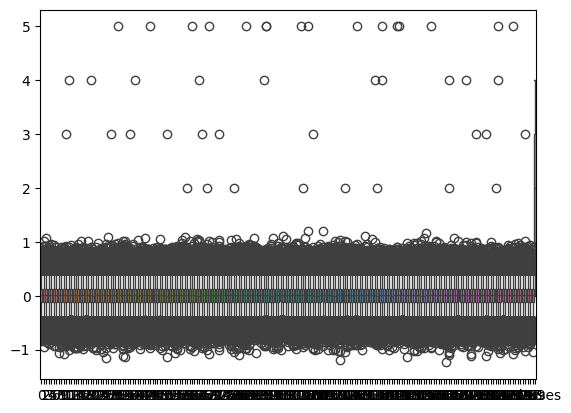

In [6]:
sns.boxplot(df_2.loc[:])

<AxesSubplot: >

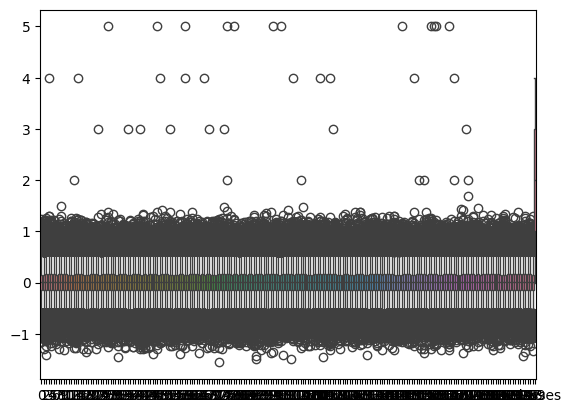

In [7]:
sns.boxplot(df_3.loc[:])

<AxesSubplot: >

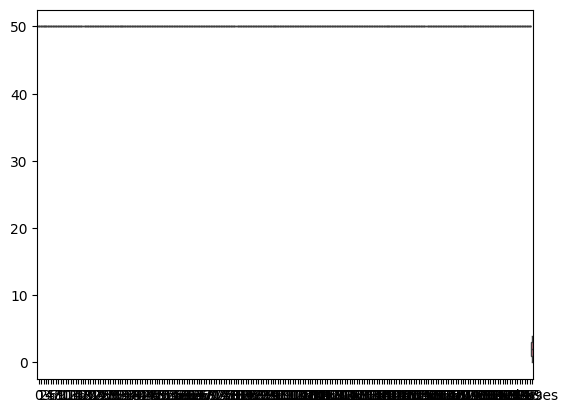

In [8]:
sns.boxplot(df_4.loc[:])

<AxesSubplot: >

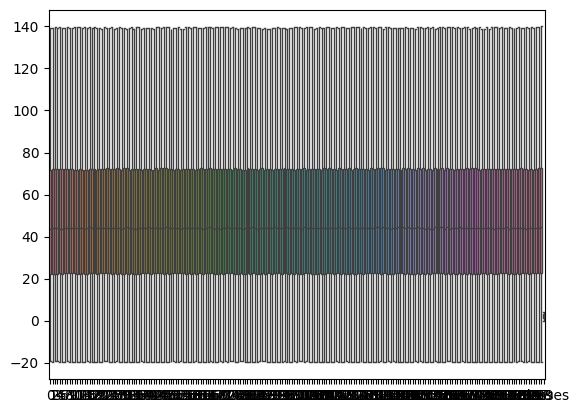

In [9]:
sns.boxplot(df_5.loc[:])

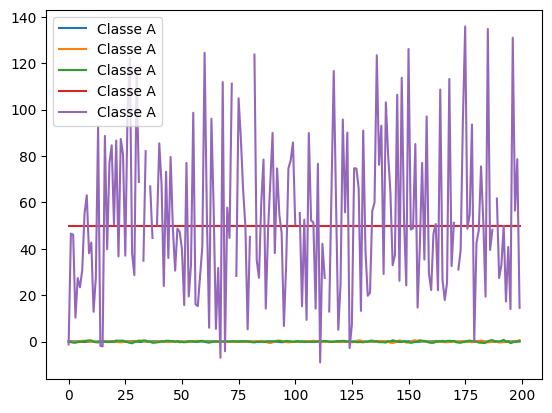

In [ ]:
for df in [df_1, df_2, df_3, df_4, df_5]:
    df.loc[1, :].plot(label='Classe A')


plt.legend(loc='upper left')

plt.show()

**Normalização**

In [10]:

# create an abs_scaler object
abs_scaler = MaxAbsScaler()

# calculate the maximum absolute value for scaling the data using the fit method
abs_scaler.fit(df_5_new)

# the maximum absolute values calculated by the fit method
abs_scaler.max_abs_


# transform the data using the parameters calculated by the fit method (the maximum absolute values)
df_5_Max = abs_scaler.transform(df_5_new)

# store the results in a data frame
df_5_Max = pd.DataFrame(df_5_Max, columns=df_5_new.columns)


# This estimator scales and translates each feature individually such that it is in the given range on the training
# set, e.g. between zero and one.
min_max_scaler = MinMaxScaler()
df_5_min = min_max_scaler.fit_transform(df_5_new)
df_5_min = pd.DataFrame(df_5_min)




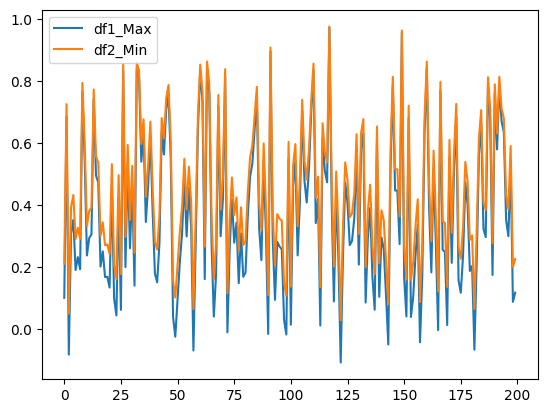

In [19]:

df_5_Max.loc[4,:].plot(label='df1_Max')
df_5_min.loc[4,:].plot(label='df2_Min')
plt.legend(loc='upper left')
plt.show()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Classes
1,-1.206457,46.549414,46.111607,10.361296,27.363958,23.396119,30.862030,55.051419,63.062865,38.094601,...,33.123615,49.853440,17.299022,40.767354,14.032730,131.006130,56.469465,78.645074,14.561567,0
2,62.824083,68.291606,40.739371,89.487447,85.516643,13.587243,91.161633,14.344760,18.180341,26.735392,...,5.996007,21.488412,86.499347,27.132945,1.962554,9.571521,39.671621,47.163325,23.415191,0
8,64.186864,27.703368,41.853096,74.807376,27.868050,5.866321,26.040077,36.039985,71.910283,60.878932,...,-8.234198,72.823441,47.700824,22.549546,116.595314,14.300545,63.780086,109.058633,94.745290,0
12,66.708076,99.724304,111.147683,58.961175,80.417457,89.799768,71.013899,126.647296,95.177214,37.196608,...,66.920282,55.714803,89.846707,85.741309,88.938826,47.919595,7.607238,2.149236,17.564687,0
13,112.323030,29.446632,59.918898,46.935130,34.052647,103.226700,16.510324,20.655974,50.264153,72.993590,...,61.358575,-1.194691,2.415622,112.583081,6.079016,39.512895,18.958762,72.935827,70.311285,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49984,-15.934722,9.900545,84.794897,111.978748,40.385315,121.120273,32.129530,77.480070,102.744746,63.832852,...,25.459330,2.813672,53.076805,19.927183,74.503261,125.630239,48.264528,104.573892,68.770935,0
49985,34.103181,74.724462,69.061677,53.442982,56.703323,19.359794,76.374373,29.289592,77.314920,20.598100,...,42.073055,8.620434,69.312016,41.292706,36.718664,69.887861,5.525119,15.581098,6.308845,0
49986,67.460577,47.606577,49.233448,31.614261,74.193322,89.095360,-1.800773,50.348424,79.682512,33.877396,...,-7.717897,48.009247,69.097143,-1.108498,68.729234,76.422521,58.321080,46.165139,96.188952,0
49994,76.853465,39.443245,57.790447,19.195842,82.286217,-3.310553,38.151875,38.665310,-3.532630,60.839029,...,47.835016,NaN,65.754065,53.114389,76.037709,50.867288,84.898109,5.841109,119.817244,0


#**Pré-processamento de dados:**

In [11]:
df_5_class_a = df_5[df_5['Classes'] == 0]
df_5_class_b = df_5[df_5['Classes'] == 1]
df_5_class_c = df_5[df_5['Classes'] == 2]
df_5_class_d = df_5[df_5['Classes'] == 3]
df_5_class_e = df_5[df_5['Classes'] == 4]

In [93]:
df_1['Classes']

0        3
1        0
2        0
3        1
4        3
        ..
49995    1
49996    4
49997    3
49998    0
49999    1
Name: Classes, Length: 50000, dtype: int64

In [17]:
df_5_new

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,20.881372,15.145424,72.027388,48.214406,131.643082,41.718371,77.190388,132.137176,85.425556,48.097219,...,123.293161,56.924154,87.385904,3.348593,16.641810,3.697981,108.142391,17.575017,76.216150,29.315787
1,-1.206457,46.549414,46.111607,10.361296,27.363958,23.396119,30.862030,55.051419,63.062865,38.094601,...,27.373759,33.123615,49.853440,17.299022,40.767354,14.032730,131.006130,56.469465,78.645074,14.561567
2,62.824083,68.291606,40.739371,89.487447,85.516643,13.587243,91.161633,14.344760,18.180341,26.735392,...,51.169306,5.996007,21.488412,86.499347,27.132945,1.962554,9.571521,39.671621,47.163325,23.415191
3,-7.094894,51.408032,76.682650,5.085699,22.564127,76.027758,17.434208,3.158283,23.282799,22.444662,...,-4.630175,38.254381,96.444782,111.459248,51.875774,30.796453,-1.938128,19.691450,43.165328,67.912757
4,14.008962,95.614914,-11.578788,42.905703,49.074270,26.468865,32.333575,26.889737,106.665714,76.073738,...,106.132122,80.656916,109.780935,93.432256,88.455765,49.130590,41.568268,74.413566,12.231324,16.413499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,54.279703,33.188985,99.085747,65.970407,36.502635,77.214711,82.623710,37.289715,74.371652,68.321238,...,52.572778,104.925094,40.341060,16.003802,-10.196549,120.071474,28.284208,31.574527,106.503302,66.922215
49996,63.216018,-2.271451,56.004961,71.316767,80.002577,42.061986,6.507342,9.822835,12.104164,45.486819,...,35.429833,116.148810,40.127813,14.780547,82.270512,48.137013,47.898710,54.301762,-1.065064,35.855684
49997,65.833098,39.942176,19.359819,-2.557807,64.279789,41.268713,92.095870,20.574753,29.783843,64.198265,...,40.078331,12.264026,83.102038,72.956322,22.937692,60.194568,127.051719,92.075226,74.312377,38.988227
49998,47.373926,82.291995,24.378955,49.286727,40.478231,31.073879,122.045263,16.903205,52.003456,7.796169,...,39.512072,38.021549,22.106981,49.748936,91.203913,65.542078,22.925709,29.774810,43.956403,48.921039


In [50]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(df_5_new,  dt_class.values.ravel(),test_size=.3,random_state=123)

In [ ]:
# compare machine learning algorithms on the sonar classification dataset
from pycaret.classification import setup
from pycaret.classification import compare_models
# define the location of the dataset

# set column names as the column number
n_cols = df_5_new.shape[1]
df_5_new.columns = [str(i) for i in range(n_cols)]
# setup the dataset
grid = setup(data=df_5_new, target=dt_class.values.ravel(), html=False, verbose=False)
# evaluate models and compare models
best = compare_models()
# report the best model
print(best)

#**SELEÇÃO DE FEATURES**

*   **ANOVA**




In [37]:
univariate = f_classif(X_train, y_train)
univariate[0]

array([1.0240991 , 1.49746995, 1.05848596, 1.24359589, 1.33343339,
       0.418021  , 1.27552975, 0.57669514, 1.1283975 , 0.24740455,
       1.13754361, 1.17796607, 1.25980839, 1.55572545, 0.53002008,
       0.73459366, 0.28094232, 0.82308978, 1.84484378, 0.26516871,
       1.56862506, 0.28415279, 1.20009074, 0.43070049, 0.68783304,
       0.8112359 , 1.48850874, 2.88357083, 1.61922844, 0.59890348,
       0.82328035, 0.01194013, 0.62913769, 0.45948876, 1.08980945,
       0.46657092, 0.5950788 , 1.16638141, 0.38350625, 0.68698124,
       0.67193611, 1.73630404, 0.40369539, 1.48045801, 1.36570784,
       1.03930198, 0.32047041, 1.75310442, 2.11396744, 0.52375445,
       1.85994039, 1.53942359, 0.51494685, 0.94332423, 0.84416849,
       0.5580026 , 0.60611687, 0.69690437, 0.74325799, 0.61683239,
       1.19117812, 0.55388997, 0.54392503, 0.52671626, 0.12503803,
       0.74774608, 1.28618223, 0.23958885, 0.63395064, 0.93056301,
       3.0366944 , 0.68154509, 1.20808152, 0.45249097, 1.49255

<AxesSubplot: title={'center': 'Univariate Feature Selection'}>

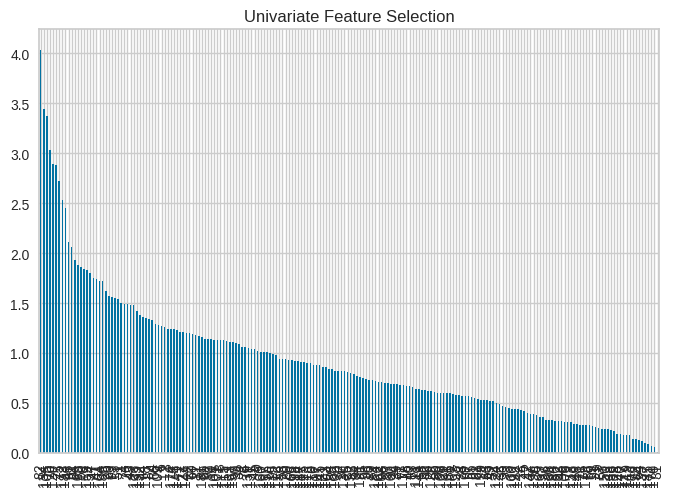

In [38]:
univariate = pd.Series(univariate[0])
univariate.index = X_train.columns
univariate.sort_values(ascending=False, inplace=True)
univariate.plot.bar(title='Univariate Feature Selection')

In [41]:
sel_ = SelectKBest(score_func=f_classif, k=10)
fit = sel_.fit(X_train, y_train)
X_train.columns[fit.get_support()]


Int64Index([27, 48, 70, 75, 82, 105, 126, 134, 172, 183], dtype='int64')

In [44]:
X_train = X_train[X_train.columns[fit.get_support()]]

In [45]:
X_train

,27,48,70,75,82,105,126,134,172,183
17325,0.615925,78.425354,30.985610,115.268734,50.655803,-13.595453,-1.220762,95.701521,38.708597,9.382696
13544,63.707649,103.363286,31.559228,18.146597,41.100952,89.962299,92.239424,25.193998,32.211965,78.260457
49844,74.692271,115.247137,3.107219,69.429221,25.346420,34.157113,22.107186,73.692058,23.147340,78.285722
16371,60.041316,-4.195678,133.215105,2.096047,43.329181,45.872337,-6.756180,81.450211,117.432532,57.293667
13084,32.034584,13.556061,62.271910,118.637453,60.897929,100.157733,62.621522,80.928897,18.647924,41.295087
...,...,...,...,...,...,...,...,...,...,...
7763,64.689301,67.424504,68.929354,56.879588,81.386470,64.658869,5.544889,21.140317,15.275592,62.455601
15377,-5.345448,30.463580,19.916155,34.274444,54.851000,-1.244025,10.121411,7.300010,66.563355,77.019516
17730,16.777558,85.124510,98.094845,1.416167,90.630106,59.346019,54.750477,11.674930,74.098144,-7.186569
28030,24.584969,54.260731,67.117321,74.943614,-4.958441,90.795177,23.245290,52.914258,53.605295,-0.734383


Dataset 5 precisa de preenchimento de valores nulos. Outrossim, os valores aparentam estar fora de escala.

Dataset 4 aparentemente o sensor está com problema, pois está com a maioria dos valores repetidos dada a precisão.

Dataset 3 necessita de remoção da última coluna, porquanto os valores apresentam em maioria esmagadora NaN, portanto, não se consegue extrair informação útil dessa coluna. O mesmo caso se repete para os datasets 1 e 2.


*   **Autoencoder**

Epoch 1/50
2188/2188 - 12s - loss: 1082.9243 - val_loss: 811.3009 - 12s/epoch - 5ms/step
Epoch 2/50
2188/2188 - 10s - loss: 776.1554 - val_loss: 711.0127 - 10s/epoch - 5ms/step
Epoch 3/50
2188/2188 - 9s - loss: 716.6440 - val_loss: 676.8478 - 9s/epoch - 4ms/step
Epoch 4/50
2188/2188 - 9s - loss: 692.2081 - val_loss: 663.5163 - 9s/epoch - 4ms/step
Epoch 5/50
2188/2188 - 9s - loss: 678.2827 - val_loss: 653.2660 - 9s/epoch - 4ms/step
Epoch 6/50
2188/2188 - 9s - loss: 670.2515 - val_loss: 660.7675 - 9s/epoch - 4ms/step
Epoch 7/50
2188/2188 - 9s - loss: 659.3947 - val_loss: 634.8408 - 9s/epoch - 4ms/step
Epoch 8/50
2188/2188 - 9s - loss: 655.3077 - val_loss: 628.8784 - 9s/epoch - 4ms/step
Epoch 9/50
2188/2188 - 9s - loss: 649.2463 - val_loss: 635.0362 - 9s/epoch - 4ms/step
Epoch 10/50
2188/2188 - 10s - loss: 643.4213 - val_loss: 625.1936 - 10s/epoch - 5ms/step
Epoch 11/50
2188/2188 - 11s - loss: 641.3550 - val_loss: 621.0793 - 11s/epoch - 5ms/step
Epoch 12/50
2188/2188 - 10s - loss: 640.062

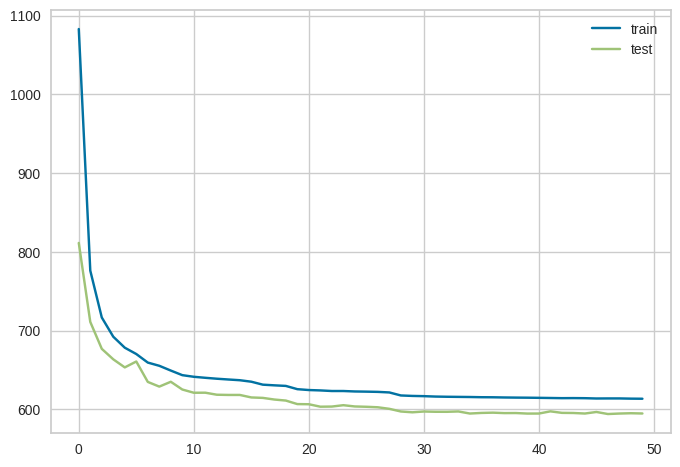

In [56]:
# train autoencoder for classification with with compression in the bottleneck layer
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

n_inputs = 200
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=50, batch_size=16, verbose=2, validation_data=(X_test,X_test))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

#**Treinamento e ajuste de modelo**

In [46]:
settings = {
    "time_budget": 300,  # total running time in seconds
    "metric": 'accuracy',
                        # check the documentation for options of metrics (https://microsoft.github.io/FLAML/docs/Use-Cases/Task-Oriented-AutoML#optimization-metric)
    "task": 'classification',  # task type
    "log_file_name": 'airlines_experiment.log',  # flaml log file
    "seed": 7654321,    # random seed
}

In [69]:
'''The main flaml automl API'''
automl = AutoML()

automl.fit(X_train=X_train_encode, y_train=y_train, **settings)

[flaml.automl.logger: 02-11 19:41:09] {1679} INFO - task = classification
[flaml.automl.logger: 02-11 19:41:09] {1690} INFO - Evaluation method: holdout
[flaml.automl.logger: 02-11 19:41:09] {1788} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 02-11 19:41:09] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 02-11 19:41:09] {2218} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 02-11 19:41:09] {2344} INFO - Estimated sufficient time budget=2852s. Estimated necessary time budget=66s.
[flaml.automl.logger: 02-11 19:41:09] {2391} INFO -  at 0.3s,	estimator lgbm's best error=0.8071,	best estimator lgbm's best error=0.8071
[flaml.automl.logger: 02-11 19:41:09] {2218} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 02-11 19:41:10] {2391} INFO -  at 0.6s,	estimator lgbm's best error=0.7994,	best estimator lgbm's best error=0.7994
[flaml.automl.logger: 02-11 1

INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


[flaml.automl.logger: 02-11 19:46:10] {2391} INFO -  at 300.8s,	estimator lrl1's best error=0.8071,	best estimator xgb_limitdepth's best error=0.7795
[flaml.automl.logger: 02-11 19:46:11] {2627} INFO - retrain xgb_limitdepth for 1.4s
[flaml.automl.logger: 02-11 19:46:11] {2630} INFO - retrained model: XGBClassifier(base_score=None, booster=None, callbacks=[],
              colsample_bylevel=0.8610032035693234, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1393378615404785,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1.5930801904848115, missing=nan,
              monotone_constraints=None, multi_strategy=Non

#Desempenho dos modelos sem seleção de features

In [31]:
'''retrieve best config and best learner'''
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: extra_tree
Best hyperparmeter config: {'n_estimators': 4, 'max_features': 0.12545642336299193, 'max_leaves': 20, 'criterion': 'gini'}
Best accuracy on validation data: 0.2163
Training duration of best run: 0.1674 s


#Desempenho dos modelos com seleção de features ANOVA

In [48]:
'''retrieve best config and best learner'''
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 21, 'num_leaves': 12, 'min_child_samples': 19, 'learning_rate': 0.06872965662734953, 'log_max_bin': 6, 'colsample_bytree': 0.8096888598613017, 'reg_alpha': 0.0023443633251726786, 'reg_lambda': 801.7523846862586}
Best accuracy on validation data: 0.2102
Training duration of best run: 0.1645 s


#Desempenho dos modelos com seleção de features Autoencoders

In [70]:
'''retrieve best config and best learner'''
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: xgb_limitdepth
Best hyperparmeter config: {'n_estimators': 8, 'max_depth': 8, 'min_child_weight': 1.5930801904848115, 'learning_rate': 0.1393378615404785, 'subsample': 0.7639372122266702, 'colsample_bylevel': 0.8610032035693234, 'colsample_bytree': 1.0, 'reg_alpha': 0.018407754631698456, 'reg_lambda': 0.12791447918393276}
Best accuracy on validation data: 0.2205
Training duration of best run: 1.391 s


#Avaliação de modelo